**Introduction to Python Imaging Library(PIL)**

1. Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.

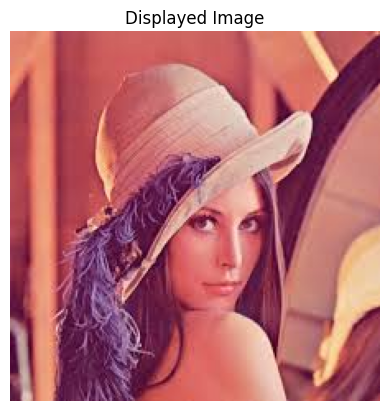

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


image_path = "/content/Leena.jpg"
img = Image.open(image_path)
img.show()


plt.imshow(img)
plt.axis("off")
plt.title("Displayed Image")
plt.show()


2. Display only the top left corner of 100x100 pixels.


• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

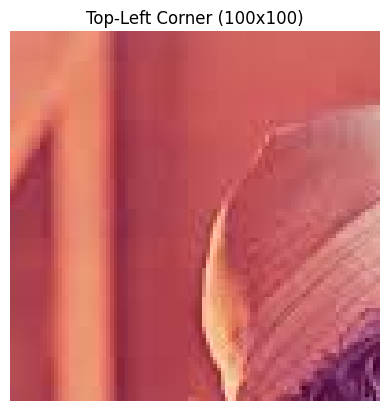

In [ ]:
import numpy as np

img_array = np.array(img)

# Extract top-left 100x100 pixels
top_left_corner = img_array[:100, :100]

plt.imshow(top_left_corner)
plt.axis("off")
plt.title("Top-Left Corner (100x100)")
plt.show()

3. Show the three color channels (R, G, B).

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

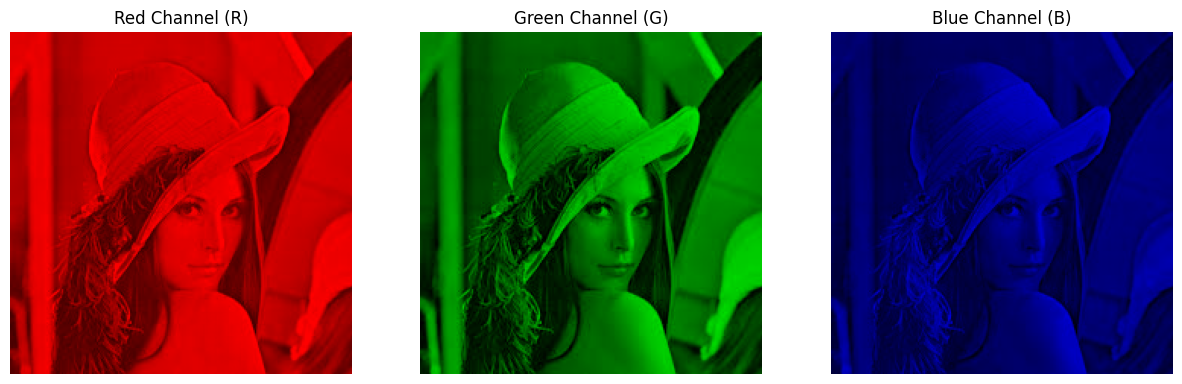

In [ ]:
img_array = np.array(img)

# Extract Red, Green, and Blue channels
red_channel = img_array.copy()
red_channel[:, :, 1:] = 0

green_channel = img_array.copy()
green_channel[:, :, [0, 2]] = 0

blue_channel = img_array.copy()
blue_channel[:, :, :2] = 0

# Display the channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(red_channel)
axes[0].set_title("Red Channel (R)")
axes[0].axis("off")

axes[1].imshow(green_channel)
axes[1].set_title("Green Channel (G)")
axes[1].axis("off")

axes[2].imshow(blue_channel)
axes[2].set_title("Blue Channel (B)")
axes[2].axis("off")

plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

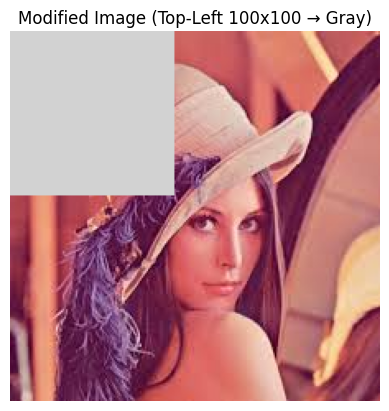

In [ ]:
img_array = np.array(img)

# Modify the top-left 100x100 pixels to a light gray color (RGB: 210, 210, 210)
img_array[:100, :100] = [210, 210, 210]

modified_img = Image.fromarray(img_array)

plt.imshow(modified_img)
plt.axis("off")
plt.title("Modified Image (Top-Left 100x100 → Gray)")
plt.show()

**Exercise - 2:**

1. Load and display a grayscale image.

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

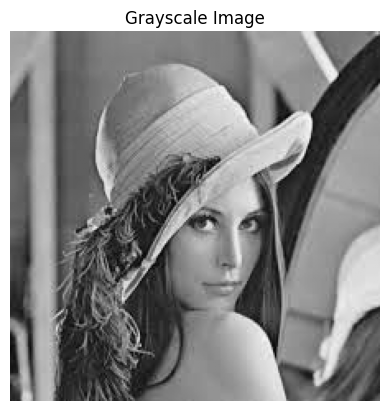

In [ ]:
# Load the image and convert to grayscale
image_path = "/content/Leena.jpg"
img_gray = Image.open(image_path).convert("L")

plt.imshow(img_gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

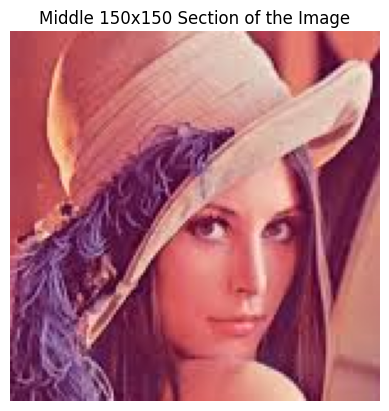

In [ ]:
img_array = np.array(img)

# Get image dimensions
height, width = img_array.shape[:2]

# Compute center coordinates
center_x, center_y = width // 2, height // 2

crop_size = 150
start_x = max(center_x - crop_size // 2, 0)
end_x = min(center_x + crop_size // 2, width)

start_y = max(center_y - crop_size // 2, 0)
end_y = min(center_y + crop_size // 2, height)

# Extract the middle section
middle_section = img_array[start_y:end_y, start_x:end_x]

plt.imshow(middle_section)
plt.axis("off")
plt.title("Middle 150x150 Section of the Image")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).

• Display the resulting binary image.

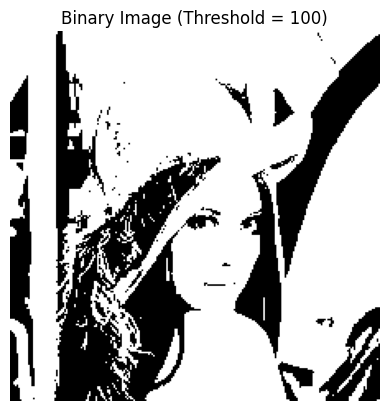

In [ ]:
image_path = "/content/Leena.jpg"
img_gray = Image.open(image_path).convert("L")  # Convert to grayscale

img_array = np.array(img_gray)

# Apply thresholding (Set values < 100 to 0, others to 255)
threshold_value = 100
binary_image = np.where(img_array < threshold_value, 0, 255).astype(np.uint8)

binary_img = Image.fromarray(binary_image)

plt.imshow(binary_img, cmap="gray")
plt.axis("off")
plt.title("Binary Image (Threshold = 100)")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating the image array.

• Display the rotated image using matplotlib.

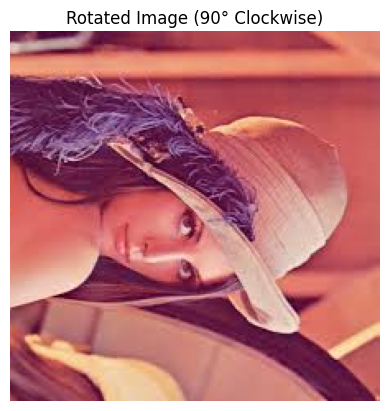

In [ ]:
# Load the image
image_path = "/content/Leena.jpg"
img = Image.open(image_path)

# Rotate the image 90 degrees clockwise
rotated_img = img.rotate(-90, expand=True)

# Display the rotated image
plt.imshow(rotated_img)
plt.axis("off")  # Hide axes for a clean display
plt.title("Rotated Image (90° Clockwise)")
plt.show()

5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

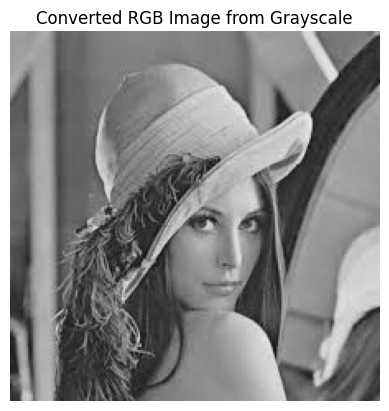

In [ ]:
# Stack the grayscale values into 3 channels (R, G, B)
rgb_array = np.stack((gray_array,)*3, axis=-1)  # Create an RGB image from grayscale

# Convert back to an image
rgb_image = Image.fromarray(rgb_array)

# Display the RGB image
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Converted RGB Image from Grayscale")
plt.show()

**3 Image Compression and Decompression using PCA.**

1. Load and Prepare Data:

• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

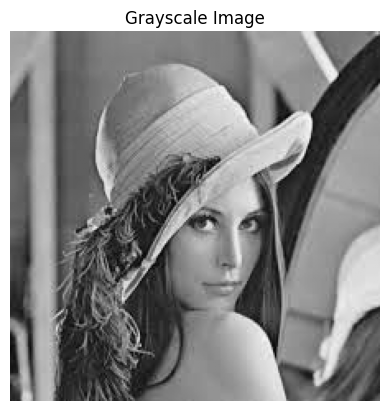

Covariance Matrix of the Standardized Image:
[[ 0.69101464  0.65771915  0.62257288 ... -0.23396724 -0.21334104
  -0.16779308]
 [ 0.65771915  0.6390946   0.61882819 ... -0.28296366 -0.26275366
  -0.22281311]
 [ 0.62257288  0.61882819  0.61836177 ... -0.32865339 -0.30924964
  -0.2747879 ]
 ...
 [-0.23396724 -0.28296366 -0.32865339 ...  1.33674339  1.33887706
   1.29914369]
 [-0.21334104 -0.26275366 -0.30924964 ...  1.33887706  1.36133568
   1.32781198]
 [-0.16779308 -0.22281311 -0.2747879  ...  1.29914369  1.32781198
   1.34958054]]


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/Leena.jpg"
img = Image.open(image_path)

# Convert to grayscale if it's a color image
img_gray = img.convert("L")
img_array = np.array(img_gray, dtype=np.float64)

# Standardize the data
mean_pixel = np.mean(img_array)
std_pixel = np.std(img_array)
standardized_img = (img_array - mean_pixel) / std_pixel

# Compute the covariance matrix
cov_matrix = np.cov(standardized_img, rowvar=False)

# Display the grayscale image
plt.imshow(img_gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

# Print covariance matrix
print("Covariance Matrix of the Standardized Image:")
print(cov_matrix)


2. **Eigen Decomposition and Identifying Principal Components:**

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

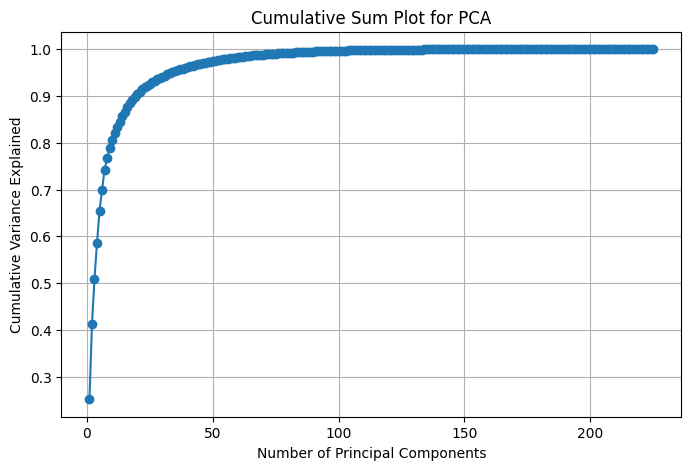

Top 10 Eigenvalues: [43.81271013 27.92825599 16.90581148 13.33332159 11.75186499  7.99880762
  7.25386172  4.36996806  3.97719459  2.86630155]


In [ ]:
#  Standardize the Data (Center the dataset)
mean_pixel = np.mean(img_array)
std_pixel = np.std(img_array)
standardized_img = (img_array - mean_pixel) / std_pixel

#  Compute the Covariance Matrix
cov_matrix = np.cov(standardized_img, rowvar=False)

#  Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

#  Sort Eigenvalues and Eigenvectors in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

#  Compute Cumulative Sum of Eigenvalues to Identify Principal Components
cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

#  Plot the Cumulative Sum to Identify Principal Components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Sum Plot for PCA")
plt.grid(True)
plt.show()

# Display the first 10 sorted eigenvalues for reference
print("Top 10 Eigenvalues:", sorted_eigenvalues[:10])


Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

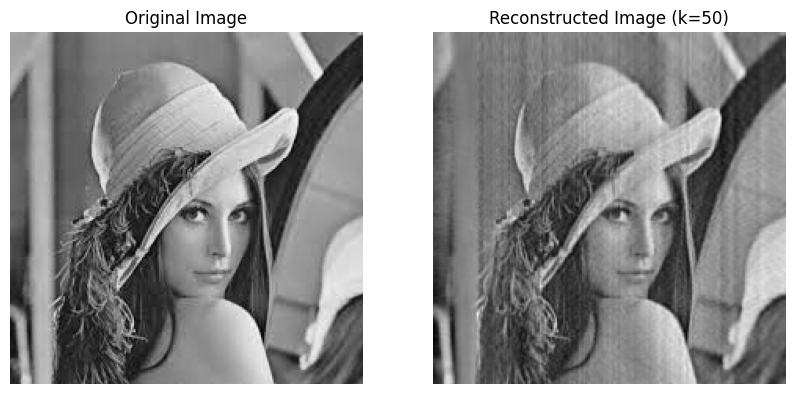

In [ ]:
#  Choose Top k Principal Components (Compression)
k = 50  # Adjust this value based on the cumulative variance plot
top_k_eigenvectors = sorted_eigenvectors[:, :k]

#  Project Data onto k Principal Components (Compression)
compressed_data = np.dot(standardized_img, top_k_eigenvectors)

#  Reconstruct Image
reconstructed_data = np.dot(compressed_data, top_k_eigenvectors.T) * std_pixel + mean_pixel

#  Display Original and Reconstructed Images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img_array, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(reconstructed_data, cmap="gray")
ax[1].set_title(f"Reconstructed Image (k={k})")
ax[1].axis("off")

plt.show()